##### Multilinear Regression
- Assumption in Multilinear Regression
1. Linearity:The relationship between the predictors and the response is linear.
2. Independence:Observations arer independent of each other.
3. Homoscedasticity:The residuals(different between observed and predicted values) exhbit constant vareiance at levels of the predicator
                    

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [3]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars= pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Descrpition of columns
- MPG : Milege of the car (Mile per Gallon)
- HP  : Horse ower of the car
- VOL : Volume of the car (size)
- SP : Top speed of the car (Miles per hour)
- WT : Weight of the car (Pounds) 

# EDA

In [7]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observations 
- There are no missing values
- There are 81 obseravtions
- The data types of the columns ara relevent and valid

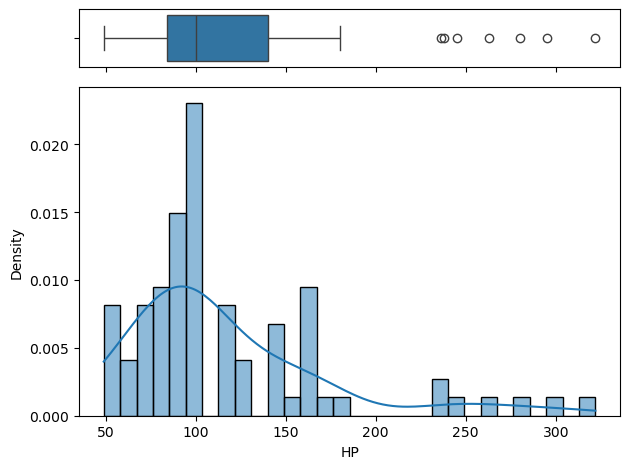

In [9]:
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat='density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

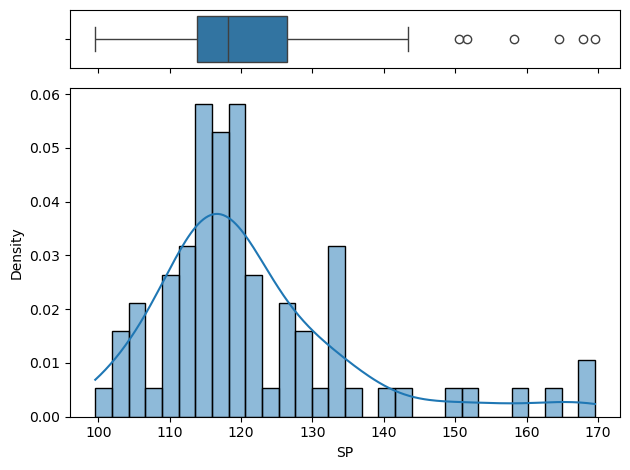

In [10]:
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='SP',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='SP',ax=ax_hist,bins=30,kde=True,stat='density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

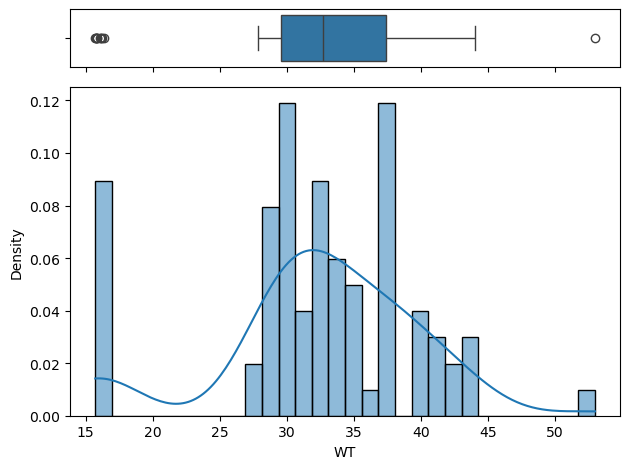

In [11]:
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='WT',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='WT',ax=ax_hist,bins=30,kde=True,stat='density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

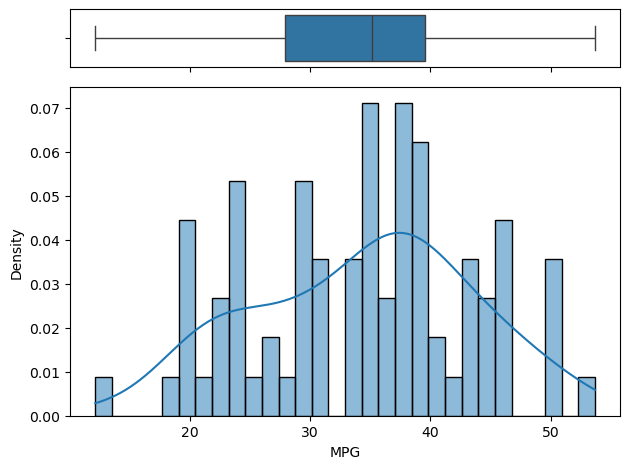

In [12]:
#Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#Creating a boxplot
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='')
#Remove x Label for the boxplot
#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
#Adjust Layout
plt.tight_layout()
plt.show()

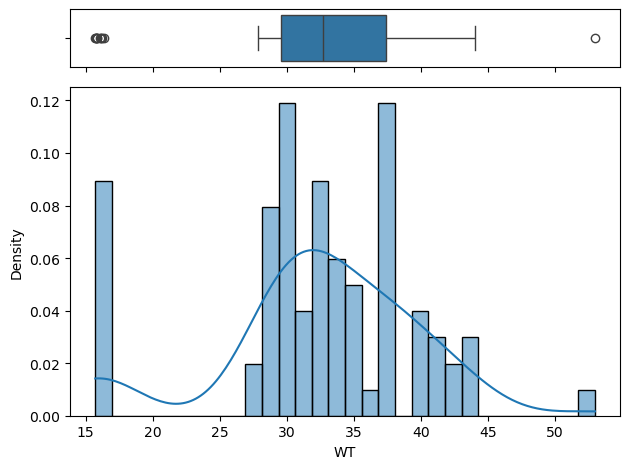

In [13]:
#Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#Creating a boxplot
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='')
#Remove x Label for the boxplot
#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
#Adjust Layout
plt.tight_layout()
plt.show()

#### Observations from boxplot and histograms
* There are some extreme values (outliers)observed in towards the right tail of SP and HP distributions.
* In VOL and WT columns,a few outliers are observed in both tails of their observations.
* The extreme values of cars data may have from the specially designed nature of cars.
* As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

#### Checking for duplicated rows


In [16]:
cars[cars.duplicated()]


,HP,VOL,SP,WT,MPG


#### Observations 
* High Positive Correlation between VOL and WT.
* Negative Correlation between MPG and other variables.
* Strong Positive Correlation between HP and SP.
* Between x and y,all the variables of x are showing moderate to high correlation srengths,highest correlations,strengths,highest being between HP and MPG.
* Therefore this dataset qualifies for building a multiple linear regression model to predict MPG.
* Among x columns(x1,x2,x3 and x4) ,some high correlation strengths are observed between SP vs HP,VOL vs WT.
* The high correlation among x columns is nor desirable ass it might lead to multicollinearity problem.

#### Preparing a preliminary model considering all X columns

In [19]:
#Build model
#Import statsmodel.formula.api as smf
model1 = smf.ols('MPG~WT+VOL+SP+HP',data = cars).fit()

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        10:45:52   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations
The R- squared and adjusted R-squared values are goos and about 75%of variablity in Y is explained by coumns
The probability value with respect to F - statistic is close to zero indicating that all or someof X columns are significant
The p-value for Vol and WT are higher than 5% indiacting some interaction issues among themselves , which need to be further explored

In [22]:
df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [23]:
pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [24]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df1["actual_y1"],df1["pred_y1"])
print("MSE: ",mse)
print("RMSE: ",np.sqrt(mse))
                       

MSE:  18.897141152343096
RMSE:  4.347084212704315


#### Checking for multicollinearity among X-columns using VIF method

In [26]:
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [27]:
# Compute VIF values
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


#### Observations
- The ideal range of VIF values shall be between 0 to 10.However slightly higher values can be tolerated 
- As seen from the very high VIF values for VOL and WT,it is clear that they are prone to muliticollineary prone
- Hence it ise decided to drop one of the columns (either VOL or WT) to ov ercome the muticollinearity.
- It is decided to drop WT and retian VOL column in further models.

In [29]:
cars1 = cars.drop("WT", axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [30]:
import statsmodels.formula.api as smf
model2 = smf.ols('MPG~VOL+SP+HP',data=cars1).fit()

In [31]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        10:45:53   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Find the performance metrics
# Create a data frame with actual y and predicted y 

df2 = pd.DataFrame()
df2["actual_y2"] = cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [33]:
# Predict for the given x data columns
pred_y2 = model2.predict(cars1.iloc[:,0:4])
df2["pred_y2"] = pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [34]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df2["actual_y2"],df2["pred_y2"])
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

MSE : 18.911053388711228
RMSE : 4.34868409851891


#### Observation
- The adjusted R-suared value improved slightly to 0.76
- All the p-values for model parameters are less than  5% hence they are significant
- Therefore the HP,VOL,SP columns are finalized

#### Identification of high influence point(spatial outliers)

In [37]:
cars1.shape

(81, 4)

In [38]:
k = 3
n = 81
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.14814814814814814

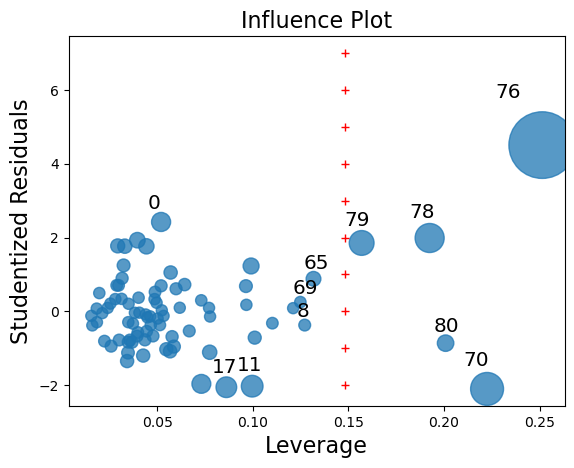

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1,alpha=0.05)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y, 'r+')
plt.show()

#### Observations
- From the above plot,it is evident that data points 65,70,76,78,79,80 are influencers.
- As their H Leverage values are higher and size is higher

In [41]:
cars1[cars1.index.isin([65,70,76,8,79,60])]

,HP,VOL,SP,MPG
8,62,50,102.598513,46.716554
60,145,111,130.208698,27.354265
65,165,50,126.598513,40.050000
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
79,295,119,167.944460,19.833733


In [42]:
cars2=cars1.drop(cars1.index[[65,70,76,78,79,80]],axis=0).reset_index(drop=True)

In [43]:
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
70,162,132,133.140074,23.203569
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837


#### Build Model3 0n cars2 dataset

In [83]:
model3= smf.ols('MPG~VOL+SP+HP',data = cars2).fit()

In [89]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.60e-33
Time:                        10:51:56   Log-Likelihood:                -187.46
No. Observations:                  75   AIC:                             382.9
Df Residuals:                      71   BIC:                             392.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6816     11.600      0.404      0.688     -18.448      27.811
VOL           -0.0952      0.021     -4.451      0.000      -0.138      -0.053
SP             0.6342      0.124      5.134      0.000       0.388       0.881
HP            -0.3350      0.034     -9.937      0.000      -0.402      -0.268
==============================================================================
Omnibus:                       20.724   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.198
Skew:                           1.233   Prob(JB):                     1.24e-06
Kurtosis:                       4.619   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Performance Metrics for model3

In [92]:
df3= pd.DataFrame()
df3["actual_y3"] =cars2["MPG"]
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [96]:
pred_y3 = model3.predict(cars.iloc[:,0:3])
df3["pred_y3"] = pred_y3
df3.head()

,actual_y3,pred_y3
0,53.700681,45.872002
1,50.013401,44.385430
2,50.013401,44.385430
3,45.696322,44.433742
4,50.504232,44.421272


In [102]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df3["actual_y3"], df3["pred_y3"])
print("MSE :", mse)
print("RMSE :",np.sqrt(mse))

MSE : 10.376822850168518
RMSE : 3.2213076304768715


#### Comparison of models
                     

| Metric         | Model 1 | Model 2 | Model 3 |
|----------------|---------|---------|---------|
| R-squared      | 0.771   | 0.770   | 0.885   |
| Adj. R-squared | 0.758   | 0.761   | 0.880   |
| MSE            | 18.89   | 18.91   | 8.68    |
| RMSE           | 4.34    | 4.34    | 2.94    |


- **From the above comparison table it is observed that model3 is the best among all with superior performance metrics**

#### Check the validity of model assumptions

In [114]:
model3.resid

0     7.828680
1     5.627971
2     5.627971
3     1.262580
4     6.082960
        ...   
70    0.919969
71   -2.559623
72   -3.702073
73    0.724230
74    9.700384
Length: 75, dtype: float64

In [118]:
model3.fittedvalues

0     45.872002
1     44.385430
2     44.385430
3     44.433742
4     44.421272
        ...    
70    22.283600
71    21.645963
72    22.788414
73    18.038607
74     9.497504
Length: 75, dtype: float64

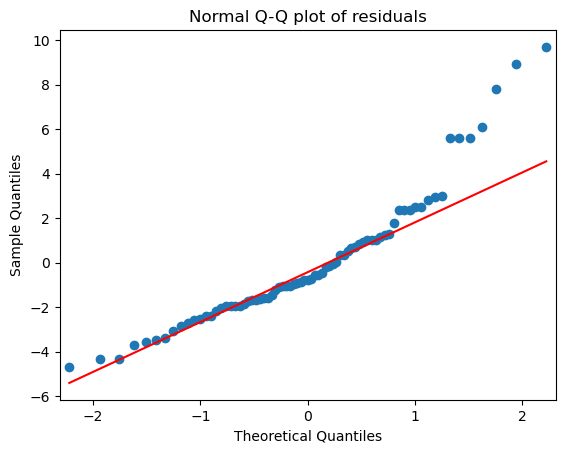

In [120]:
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

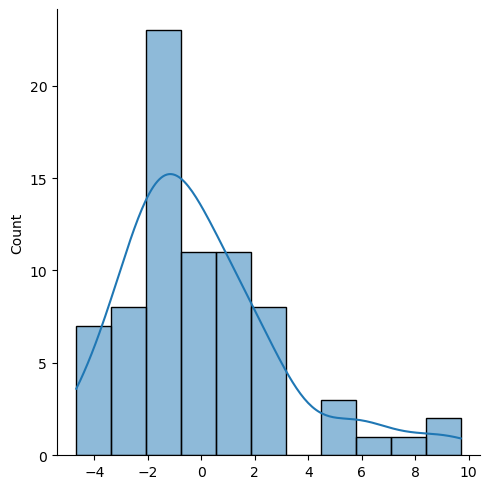

In [125]:
sns.displot(model3.resid, kde = True)

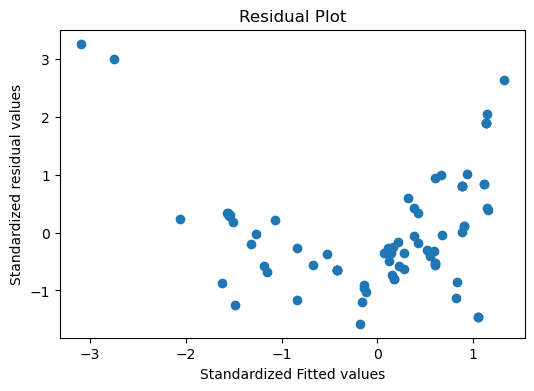

In [127]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()



plt.figure(figsize=(6,4))
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()